# Problem Analysis/Understanding

This is a classification problem that deals with predicting whether or not an individual has COVID-19.

# Data Description

The data is obained from [Machine learning-based prediction of COVID-19 diagnosis based on symptoms]( https://github.com/nshomron/covidpred/tree/master/data). This dataset contains 8 binary features : sex, age ≥60 years, known contact with an infected individual, and the appearance of five initial clinical symptoms. 


### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
# for data preprocessing
from sklearn import model_selection,preprocessing,feature_selection,ensemble,linear_model,metrics,decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# for model development
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


### Loading the dataset

In [2]:
df=pd.read_csv('E:\Machine Learning Projects\Covid19Prediction\data\corona_tested_individuals_ver_0083.english.csv')

C:\Users\user.DESKTOP-OMQ89VA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Identify the top 5 values of the dataset

In [3]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


#### Column definitions
1. Age over 60 - Age_60
2. Sex - Male (Male=1, Female=0)
3. Cough - Cough
4. Shortness of breath - Shortness_of_breath
5. Fever - Fever
6. Sore throat - Sore_throat
7. Headache - Headache
8. Contact with a confirmed individual - Contact_with_confirmed


For columns with values 0 and 1, 1=True and 0=False


# Data preparation and preprocessing
The following are the steps to be followed:
1. Handling missing values
2. Handling non-numeric data (handling categorical, ordinal variables and strings)
4. Extracting only useful and relevant features: Feature selection
5. Splitting data into Training and test sets
6. Checking for Class imbalance and tackling it
7. Standard scaling of data



## Exploratory Data Analysis

Identifying the types of values in each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


### Converting 'test_date' into a datetime object

In [5]:
df.test_date=pd.to_datetime(df['test_date'])


In [6]:
# number of data points
print(f" Number of rows:  {df.shape[0]} \n Number of columns: {df.shape[1]} ")

 Number of rows:  2742596 
 Number of columns: 10 


### Identify the values in each column

In [7]:
#identifying the unique values in each column
for i in df.columns:
    print('Unique values on',i,'column are :',df[i].unique())

Unique values on test_date column are : ['2020-11-12T00:00:00.000000000' '2020-11-11T00:00:00.000000000'
 '2020-11-10T00:00:00.000000000' '2020-11-09T00:00:00.000000000'
 '2020-11-08T00:00:00.000000000' '2020-11-07T00:00:00.000000000'
 '2020-11-06T00:00:00.000000000' '2020-11-05T00:00:00.000000000'
 '2020-11-04T00:00:00.000000000' '2020-11-03T00:00:00.000000000'
 '2020-11-02T00:00:00.000000000' '2020-11-01T00:00:00.000000000'
 '2020-10-31T00:00:00.000000000' '2020-10-30T00:00:00.000000000'
 '2020-10-29T00:00:00.000000000' '2020-10-28T00:00:00.000000000'
 '2020-10-27T00:00:00.000000000' '2020-10-26T00:00:00.000000000'
 '2020-10-25T00:00:00.000000000' '2020-10-24T00:00:00.000000000'
 '2020-10-23T00:00:00.000000000' '2020-10-22T00:00:00.000000000'
 '2020-10-21T00:00:00.000000000' '2020-10-20T00:00:00.000000000'
 '2020-10-19T00:00:00.000000000' '2020-10-18T00:00:00.000000000'
 '2020-10-17T00:00:00.000000000' '2020-10-16T00:00:00.000000000'
 '2020-10-15T00:00:00.000000000' '2020-10-14T00:00

From the above we can see that the type of unique values each column has. Some columns such as 'age_60_and_above' and the 'gender' column contain values categorised as 'nan', which are null values. These have to be dealt with when cleaning the dataset. 

The column 'test_indication' represents the reason why an individual has been tested for COVID-19 which can be either be 'Contact with confirmed'(the individual has come into contact with someone who has tested positive), 'Abroad'(the individual had gone abroad) and 'Other'(other reasons)

### Identifying missing values

In [8]:
# the percentage of missing values in the dataset
def missing_values(dataframe:pd.DataFrame):
    # Total number of elements in the dataset
    totalCells = dataframe.size
    #Number of missing values per column
    missingCount = dataframe.isnull().sum()
    #Total number of missing values
    totalMissing = missingCount.sum()
    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

missing_values(df)

The dataset contains 2.34 % missing values.


This dataset has 2.34% of its data missing

In [9]:
def column_missingdata(dataframe:pd.DataFrame):
    #check for missing values per column
    values=df.isnull().sum().sort_values(ascending=False)
    #percentage of missing values per column
    percentage=dataframe.isnull().mean()*100
    return percentage

column_missingdata(df)

test_date               0.000000
cough                   0.000000
fever                   0.000000
sore_throat             0.000000
shortness_of_breath     0.000000
head_ache               0.000000
corona_result           0.000000
age_60_and_above       19.968089
gender                  3.386791
test_indication         0.000000
dtype: float64

The column 'age_60_and_above' and 'gender ' are missing 20% and 3% of the values respectively.


### Handling missing values

We can drop all the rows that are missing values 

In [10]:
data=df.copy()
data.head()
data.dropna(inplace=True)


In [11]:
print(df.shape)
print(data.shape)


(2742596, 10)
(2186227, 10)


In [12]:
# the percentage of information lost from dropping the missing values
(len(df)-len(data))/len(df)*100

20.28621787532688

20% of the data is lost from dropping all the missing values

## Graphical Analysis

In [13]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def correlation(df:pd.DataFrame):
    corr=df.corr()
    matrix=np.triu(df.corr())
    sns.heatmap(corr,annot=True,square=True,mask=matrix)
    fig=plt.gcf()
    figsize=fig.get_size_inches()
    fig.set_size_inches(figsize*4)
    plt.show()

### Handling non-numeric data

#### The distribution of all the non-numerical columns

In [14]:
categorical_columns=data[['age_60_and_above','gender','test_indication']]

def categorical_count(dataframe:pd.DataFrame):
    """A function that prints the value count of the categorical columns"""
    for i in dataframe.columns:
        cat_count=dataframe[i].value_counts()
    print('The number of values in',i,': \n ',cat_count)


In [15]:
categorical_count(categorical_columns)

The number of values in test_indication : 
  Other                     2018366
Contact with confirmed     151848
Abroad                      16013
Name: test_indication, dtype: int64


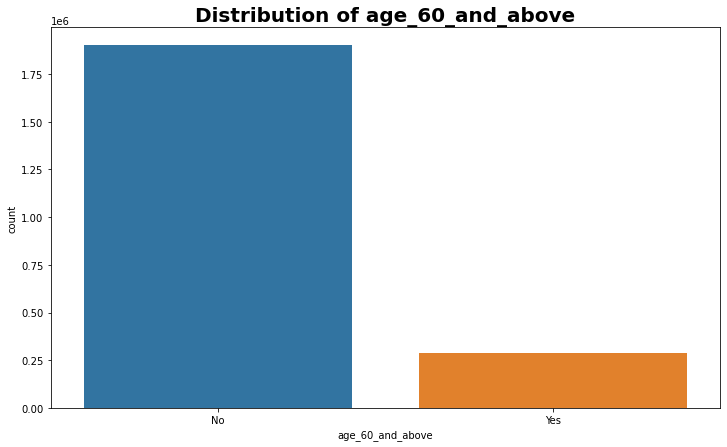

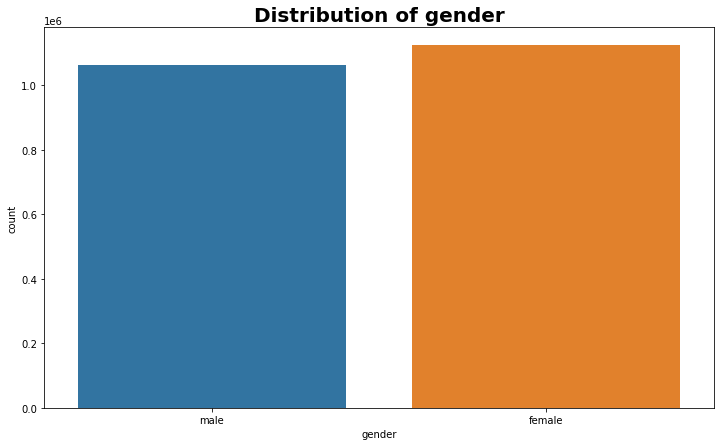

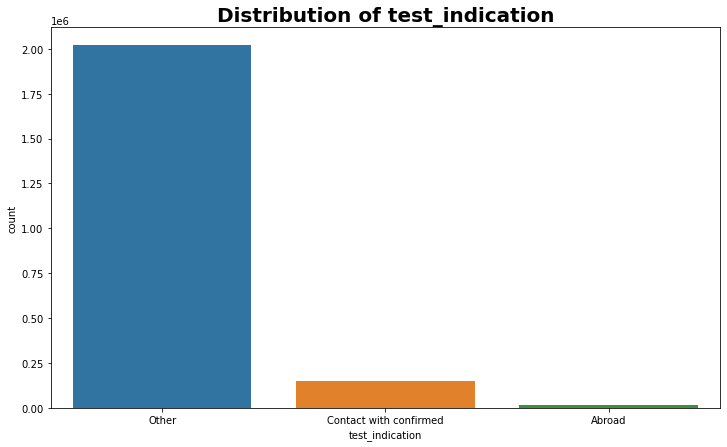

In [16]:
for i in categorical_columns.columns:
    plot_count(categorical_columns,i)

From the above graphs, the following can be noted:
1. There were significantly more people who tested 'negative' for COVID-19 results compared to 'positive' and 'other'.  Since this is the target variable, it means the dataset is imbalanced and this could affect the accuracy of the models.
2. There were more people over the age of 60 who were tested
3. There were more females than males who were tested


In [17]:
#plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)
#plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) 
#plot_scatter(data,'corona_result','gender','Relationship betweeen the corona result and gender',"gender","gender")


In [18]:
#plot_scatter(data,'corona_result','test_indication','Relationship betweeen the corona result and test indication',"gender","gender")

#### One hot encoding

In [19]:
#obtaining onehot encoded categorical columns
def oh_encoder(cat_col:pd.DataFrame):
    """A function that returns a dataframe of the categorical columns 
    obtained by one hot encoding when a dataframe containing the
    categorical columns is passed"""
    cols_new_cat=pd.get_dummies(cat_col)
    return cols_new_cat


cat_cols=oh_encoder(categorical_columns)
cat_cols.head()

,age_60_and_above_No,age_60_and_above_Yes,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,1,0,0,1,0,0,1
1,1,0,0,1,0,0,1
2,0,1,1,0,0,0,1
3,1,0,0,1,0,0,1
4,1,0,0,1,0,1,0


In [20]:
#add the one-hot encoded columns to the original dataframe
data=pd.concat([data,cat_cols],axis=1)
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,age_60_and_above_No,age_60_and_above_Yes,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,2020-11-12,0,0,0,0,0,negative,No,male,Other,1,0,0,1,0,0,1
1,2020-11-12,0,1,0,0,0,negative,No,male,Other,1,0,0,1,0,0,1
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other,0,1,1,0,0,0,1
3,2020-11-12,0,0,0,0,0,negative,No,male,Other,1,0,0,1,0,0,1
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed,1,0,0,1,0,1,0


In [21]:
num_cols=data[['test_date','cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']]
target_col=data[['corona_result']]

new_df=pd.concat([num_cols,cat_cols],axis=1)

new_df=pd.concat([new_df,target_col],axis=1)



In [22]:
new_df=new_df.set_index('test_date')
new_df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above_No,age_60_and_above_Yes,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,corona_result
test_date,,,,,,,,,,,,,
2020-11-12,0,0,0,0,0,1,0,0,1,0,0,1,negative
2020-11-12,0,1,0,0,0,1,0,0,1,0,0,1,negative
2020-11-12,0,0,0,0,0,0,1,1,0,0,0,1,negative
2020-11-12,0,0,0,0,0,1,0,0,1,0,0,1,negative
2020-11-12,0,1,0,0,0,1,0,0,1,0,1,0,negative


We can drop rows that have corona result as 'other' since this is not defined

In [23]:
new_df=new_df[new_df.corona_result != "other"]


In [24]:
new_df.to_csv("covid_processed.csv")

### Splitting the dataset

The dataset is split into test and train set with a test size of 30%

#### Obtaining the predictor variables and the target variables

In [25]:
X=new_df.drop("corona_result",axis=1)
y=new_df['corona_result']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Checking for class imbalance

In [27]:
y_train.value_counts()

negative    1359932
positive     146396
Name: corona_result, dtype: int64

There are only 146,049 instances of positive instances out of a total of 1,506,328 instances. This means the machine learning algotrithm will have exposure to very little of the training instances with a positive corona result. To handle class imbalance, oversampling techniques could be used. This could be done using the SMOTE algorithm

### Scaling of the data

In [28]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Feature Selection

In [29]:
feature_names=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above_No', 'age_60_and_above_Yes', 'gender_female',
       'gender_male', 'test_indication_Abroad',
       'test_indication_Contact with confirmed', 'test_indication_Other']

# Model development and Model Evaluation

1. Test a number of classifier models on training data
2. Select the one the works the best and check performance on test data


The models to be used include: Decision Tree, Random Forests, Logistic Regression,Naive Bayes

## Using Decision Tree

In [30]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
print("Accuracy on training set : ", dt_clf.score(X_train,y_train))
print("Accuracy on test set : ", dt_clf.score(X_test,y_test))

Accuracy on training set :  0.9295412420136916
Accuracy on test set :  0.9296342766857196


## Using Random Forest

In [32]:
rt_clf=RandomForestClassifier()
rt_clf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
print("Accuracy on training set : ", rt_clf.score(X_train,y_train))
print("Accuracy on test set : ", rt_clf.score(X_test,y_test))

Accuracy on training set :  0.9295412420136916
Accuracy on test set :  0.9296342766857196


## Using Logistic Regression

In [34]:
lr_clf=LogisticRegression(random_state=0)
lr_clf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [35]:
print("Accuracy on training set : ", lr_clf.score(X_train,y_train))
print("Accuracy on test set : ", lr_clf.score(X_test,y_test))

Accuracy on training set :  0.9197651507506998
Accuracy on test set :  0.9205616741794074


## Using Naive Bayes

In [36]:
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [37]:
print("Accuracy on training set : ", nb_clf.score(X_train,y_train))
print("Accuracy on test set : ", nb_clf.score(X_test,y_test))

Accuracy on training set :  0.9169404007626493
Accuracy on test set :  0.9169152841674799


## Using ensembles

### 1. Ensemble of SVM and Logistic Regression

In [38]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

voting_clf=VotingClassifier(estimators=[('lr', lr_clf),('nb',nb_clf),('decision',dt_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('nb', GaussianNB()),
                             ('decision', DecisionTreeClassifier())])

In [39]:
voting_clf.score(X_train,y_train)
voting_clf.score(X_test,y_test)

0.9296420217792029

### 2. Ensemble using Logistic Regression and Decision Trees

In [40]:
voting_clf2=VotingClassifier(estimators=[('lr', lr_clf),('decision',dt_clf)],voting='hard')
voting_clf2.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('decision', DecisionTreeClassifier())])

In [41]:
voting_clf2.score(X_train,y_train)
voting_clf2.score(X_test,y_test)

0.9205554781046207

The best performing model on the training set is the decision tree and the ensemble using SVM and logistic regression

### Feature importances

In [42]:
def plot_feature_importance(importance,names,model):
    """A function that obtains the importance of features, ranks them in order of the most important
    to the least important, displays features in form of a dataframe and visualizes the features in a bar chart"""
    feature_importance=np.array(importance)
    feature_names=np.array(names)
    data_df={'feature_names':feature_names, 'feature_importance':feature_importance}
    fi_df=pd.DataFrame(data_df)
    fi_df.sort_values(by=['feature_importance'],ascending=False,inplace=True)
    #plot
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'],y=fi_df['feature_names'])
    plt.title(model+" " +"Feature Importance")
    plt.xlabel("Feature Importance")
    plt.ylabel("feature_names")
    

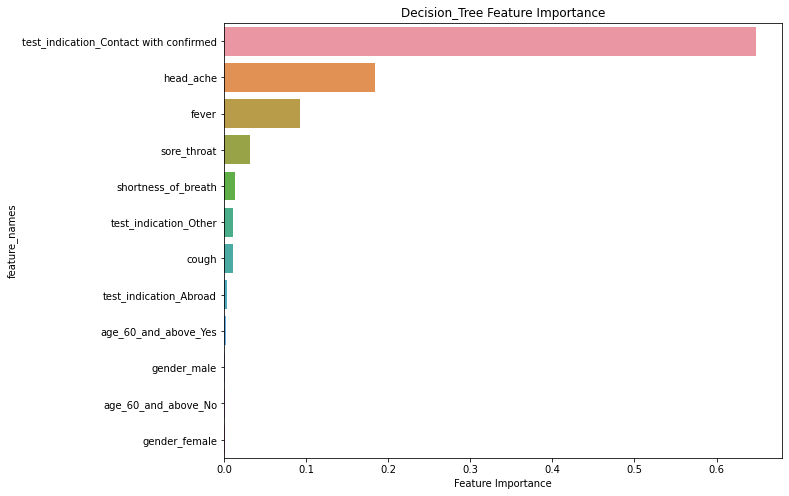

In [43]:
#decision tree
plot_feature_importance(dt_clf.feature_importances_,feature_names,'Decision_Tree')

When using the decision tree, the top 5 most important features in predicting whether an individual has COVID19 are: test_indication_Contact with confirmed, head_ache,fever, sore_throat and shortness_of_breath	

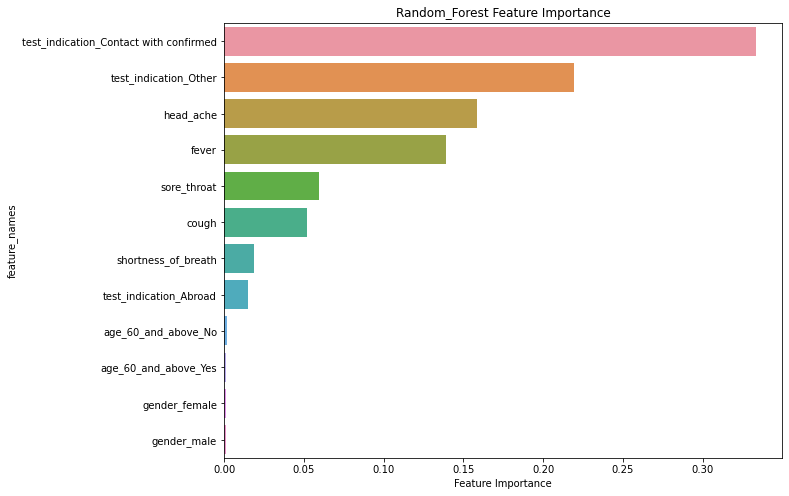

In [44]:
#random forest classifier
plot_feature_importance(rt_clf.feature_importances_,feature_names,'Random_Forest')

When using the random forest, the top 5 most important features in predicting whether an individual has COVID19 are: test_indication_Contact with confirmed, test_indication_Other,head_ache,fever, sore_throat and cough	

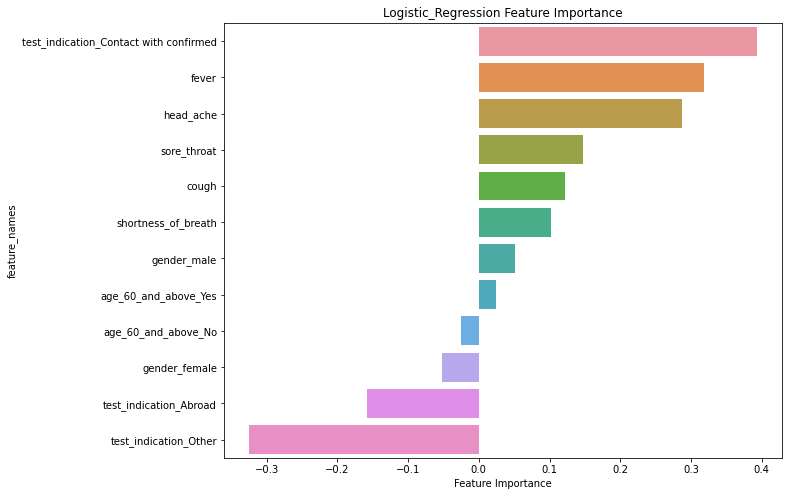

In [45]:
plot_feature_importance(lr_clf.coef_[0],feature_names,'Logistic_Regression')

When using the logistic regression, the top 5 most important features in predicting whether an individual has COVID19 are: test_indication_Contact with confirmed, fever, head_ache, sore_throat and cough

#### From the above , it can be said that the most important features are the test_indication and the appearance of the five clinical symptoms

# Building a model using only the important features

In [46]:
X_ft=new_df[['test_indication_Contact with confirmed', 'head_ache','fever', 'sore_throat', 'shortness_of_breath']]
y_ft=new_df['corona_result']
Xft_train,Xft_test,yft_train,yft_test=train_test_split(X_ft,y_ft,test_size=0.3)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [47]:
dt_clf.fit(Xft_train,yft_train)
print("Accuracy on training set : ", dt_clf.score(Xft_train,yft_train))
print("Accuracy on test set : ", dt_clf.score(Xft_test,yft_test))

Accuracy on training set :  0.9288196196313153
Accuracy on test set :  0.9284818067754078


The model performance has improved slightly